In [1]:
from pyspark.sql import SparkSession
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler
import pyspark.sql.functions as F
from pyspark.sql.types import *

# Create a Spark session
spark = SparkSession.builder.appName("EV Analysis").getOrCreate()

# Load the dataset from the uploaded path
data = spark.read.csv("EV.csv", header=True, inferSchema=True)

# Show the summary statistics
data.describe().show()

# Show the columns
print(data.columns)
# 获取行数和列数
num_rows = data.count()
num_cols = len(data.columns)

# 输出行数和列数
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")
data.printSchema()



Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/05/23 18:58:37 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


+-------+-----------------+--------------------+--------+--------------------+--------------------+------------------+------------------+------------------+------------------+------------+----------------------+--------------------+--------------------+--------------------+------------------+-----------------+
|summary|         OBJECTID|                Name|Operator|               Owner|             Address|    Car Park Count|    Max Time Limit|          Latitude|         Longitude|Current Type|Date First Operational|Number Of Connectors|     Connectors List|            GlobalID|                 x|                y|
+-------+-----------------+--------------------+--------+--------------------+--------------------+------------------+------------------+------------------+------------------+------------+----------------------+--------------------+--------------------+--------------------+------------------+-----------------+
|  count|            12366|               12366|   12366|       

In [2]:
df = data.toPandas()
df.head(10)

,OBJECTID,Name,Operator,Owner,Address,Is 24 Hours,Car Park Count,Has Carpark Cost,Max Time Limit,Has Tourist Attraction,Latitude,Longitude,Current Type,Date First Operational,Number Of Connectors,Connectors List,Has Charging Cost,GlobalID,x,y
0,179862,YHA MT COOK,MERIDIAN ENERGY LIMITED,MERIDIAN ENERGY LIMITED,"4 Kitchener Dr, Mount Cook National Park 7999,...",True,1,False,Unlimited,False,-43.737450,170.100913,AC,5/1/2020 12:00:00 AM,1,"{AC, 22 kW, Type 2 Socketed, Status: Operative...",True,0719c468-4cea-43e7-9327-f4551cff07e9,1366541.235,5153202.164
1,179863,YHA TE ANAU,MERIDIAN ENERGY LIMITED,MERIDIAN ENERGY LIMITED,"29 Mokonui St, Te Anau 9600, New Zealand",True,2,False,Unlimited,False,-45.414702,167.710591,AC,5/1/2020 12:00:00 AM,1,"{AC, 22 kW, Type 2 Socketed, Status: Operative...",True,550075e9-ef1d-416e-b00d-2897c453abe0,1186140.202,4957354.959
2,179864,NZ BLOOD SERVICE,MERIDIAN ENERGY LIMITED,MERIDIAN ENERGY LIMITED,"71 Great South Road, Epsom, Auckland 1051",False,4,False,Unlimited,False,-36.881664,174.783985,AC,10/12/2019 12:00:00 AM,4,"{AC, 44 kW, Type 2 Socketed, Status: Operative...",False,0c72b300-fac0-449a-8ad1-5a7b707c56b9,1758984.878,5916769.114
3,179865,Hampton Downs,WEL Networks Ltd,WEL Networks Ltd,"20 Hampton Downs Road, Hampton Downs",True,2,False,Unlimited,True,-37.354558,175.080300,DC,1/1/2018 12:00:00 AM,3,"{DC, 50 kW, CHAdeMO, Status: Operative, Count:...",True,42d128cb-5f38-471b-9037-56bf531676e9,1784244.724,5863764.290
4,179866,Maui Street,WEL Networks Ltd,WEL Networks Ltd,"114 Maui St, Pukete",True,2,False,Unlimited,False,-37.731714,175.222544,DC,1/1/2018 12:00:00 AM,3,"{DC, 50 kW, CHAdeMO, Status: Operative, Count:...",True,c49f1ad8-8a3c-4134-ad46-45223e82b498,1795854.604,5821625.907
5,179867,Claudelands,WEL Networks Ltd,WEL Networks Ltd,"160 Peachgrove Road, Hamilton East",True,3,False,Unlimited,False,-37.778559,175.298787,Mixed,1/1/2018 12:00:00 AM,5,"{DC, 25 kW, Type 2 CCS, Status: Operative, Cou...",False,e796275e-6dce-410b-92d7-682d381f1b9e,1802446.410,5816265.169
6,179868,Mystery Creek,WEL Networks Ltd,WEL Networks Ltd,"153 Ingram Road, Waitomo Fuel, Mystery Creek",True,2,False,Unlimited,False,-37.876729,175.324548,DC,1/1/2018 12:00:00 AM,3,"{DC, 50 kW, CHAdeMO, Status: Operative, Count:...",True,64cd5141-c90d-4fbd-b563-89666ce28154,1804444.234,5805314.995
7,179869,Huntly,WEL Networks Ltd,WEL Networks Ltd,"20 Tumate Mahuta Drive, Huntly",True,3,False,Unlimited,False,-37.564700,175.158397,Mixed,1/1/2018 12:00:00 AM,5,"{DC, 25 kW, Type 2 CCS, Status: Operative, Cou...",False,aa1ef2f1-35ad-45d3-858f-ff459639c253,1790627.807,5840290.970
8,179870,Te Kauwhata,WEL Networks Ltd,WEL Networks Ltd,"16 Wayside Road, Te Kauwhata",True,2,False,Unlimited,False,-37.412567,175.127487,DC,1/1/2018 12:00:00 AM,3,"{DC, 50 kW, CHAdeMO, Status: Operative, Count:...",True,b3c5728a-6b8d-474a-9e19-b872e6544950,1788279.247,5857234.398
9,179871,St James,WEL Networks Ltd,WEL Networks Ltd,"23 Horsham Downs Road, Rototuna",True,3,False,Unlimited,False,-37.731932,175.273584,Mixed,1/1/2018 12:00:00 AM,5,"{DC, 25 kW, Type 2 CCS, Status: Operative, Cou...",False,00f8b2d9-b7e8-4a78-b91e-c1c59f663fc8,1800352.340,5821493.617


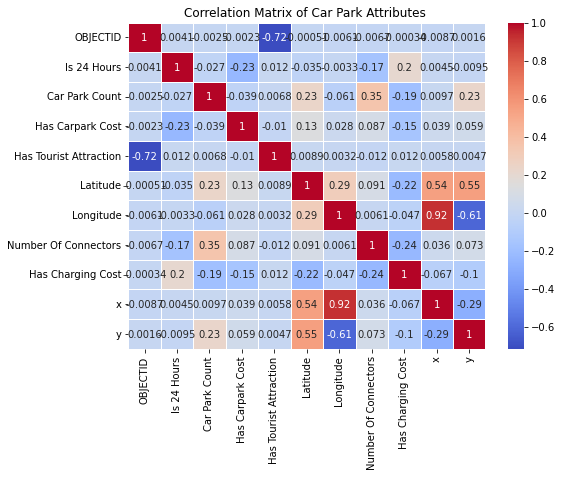

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt


# Convert to Pandas for visualization
df = data.toPandas()
df.head(5)
df_corr = df.corr()


# 使用Seaborn的heatmap函数来绘制相关性矩阵。
plt.figure(figsize=(8, 6))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix of Car Park Attributes ')
plt.show()

+--------+-----------+--------------+----------------+----------------------+------------+-----------+--------------------+-----------------+-----------+-----------+
|OBJECTID|Is 24 Hours|Car Park Count|Has Carpark Cost|Has Tourist Attraction|    Latitude|  Longitude|Number Of Connectors|Has Charging Cost|          x|          y|
+--------+-----------+--------------+----------------+----------------------+------------+-----------+--------------------+-----------------+-----------+-----------+
|  179862|          1|             1|               0|                     0|   -43.73745| 170.100913|                   1|                1|1366541.235|5153202.164|
|  179863|          1|             2|               0|                     0| -45.4147023| 167.710591|                   1|                1|1186140.202|4957354.959|
|  179864|          0|             4|               0|                     0| -36.8816643|174.7839851|                   4|                0|1758984.878|5916769.114|
|  1

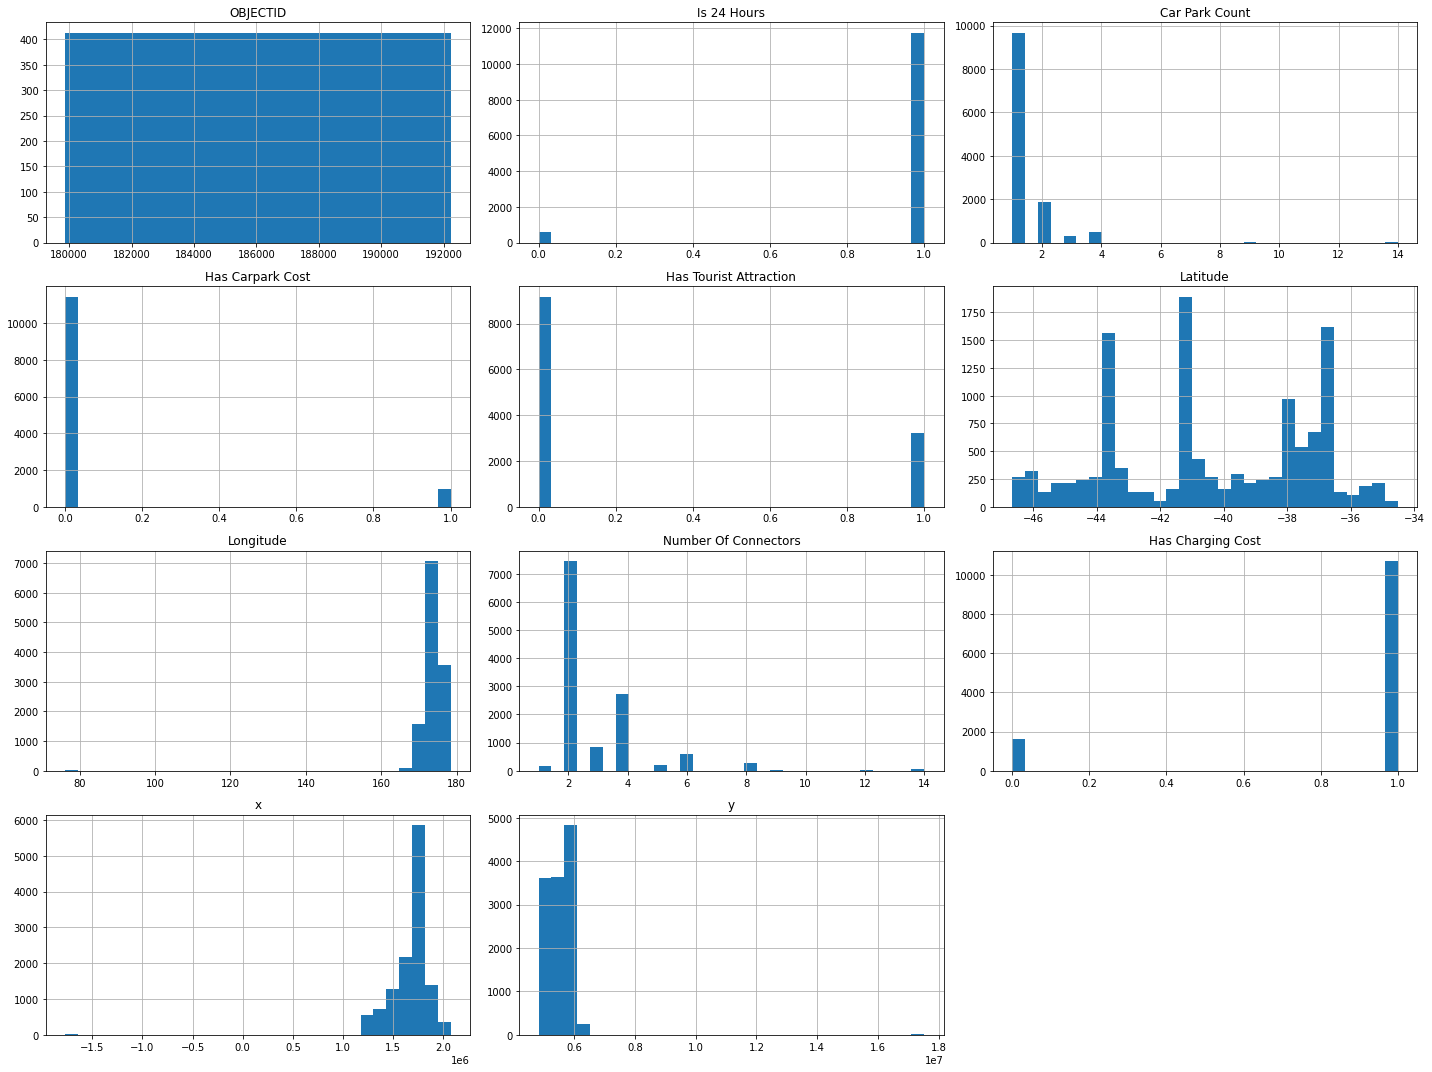

In [4]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, when

# List of boolean columns
boolean_columns = [item[0] for item in data.dtypes if item[1].startswith('boolean')]

# Convert boolean columns to integer (0 or 1)
for column in boolean_columns:
    data = data.withColumn(column, when(col(column) == True, 1).otherwise(0))


string_columns = [item[0] for item in data.dtypes if item[1].startswith('string')]
for column in string_columns:
    # 检查列是否包含 'yes' 或 'no'
    if data.select(column).distinct().rdd.flatMap(lambda x: x).collect() in ['yes', 'no']:
        data = data.withColumn(column, when(col(column) == 'yes', 1).when(col(column) == 'no', 0))
    else:
        # 删除其他所有字符串类型列
        data = data.drop(column)
        
# Show updated DataFrame to confirm changes
data.show()

# Since PySpark doesn't support direct plotting like matplotlib, you need to convert your DataFrame to Pandas (if feasible)
pandas_df = data.toPandas()

# Now use matplotlib to plot histograms
import matplotlib.pyplot as plt
pandas_df.hist(bins=30, figsize=(20, 15))
plt.tight_layout()
plt.show()

In [5]:
#缺失值
missing_values = data.select([F.count(F.when(F.col(c).isNull(), c)).alias(c) for c in data.columns])

# 将结果转换为 Pandas 进行进一步处理
missing_data = missing_values.toPandas().transpose()
missing_data.columns = ["missing_count"]

print("Columns with missing values:")
print(missing_data)

Columns with missing values:
                        missing_count
OBJECTID                            0
Is 24 Hours                         0
Car Park Count                      0
Has Carpark Cost                    0
Has Tourist Attraction              0
Latitude                            0
Longitude                           0
Number Of Connectors                0
Has Charging Cost                   0
x                                   0
y                                   0


In [6]:
# 离群值
def calculate_outliers(df, column):
    q1 = df.approxQuantile(column, [0.25], 0.05)[0]
    q3 = df.approxQuantile(column, [0.75], 0.05)[0]
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return df.filter((F.col(column) < lower_bound) | (F.col(column) > upper_bound)).count()

# 计算每列的离群值数量
outliers = {column: calculate_outliers(data, column) for column in data.columns if data.select(column).dtypes[0][1] in ['int', 'double']}

# 输出每列的离群值数量
print("Columns with outliers and their counts:")
for column, count in outliers.items():
    print(f"{column}: {count}")

Columns with outliers and their counts:
OBJECTID: 0
Is 24 Hours: 621
Car Park Count: 2700
Has Carpark Cost: 945
Has Tourist Attraction: 3200
Latitude: 0
Longitude: 540
Number Of Connectors: 378
Has Charging Cost: 1647
x: 486
y: 27


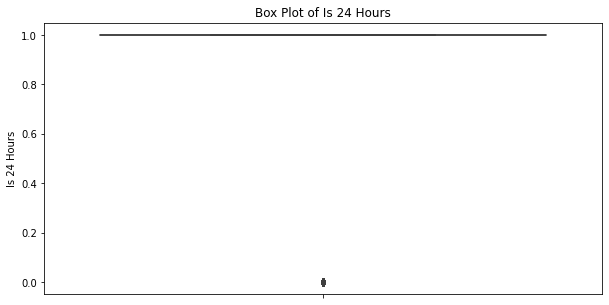

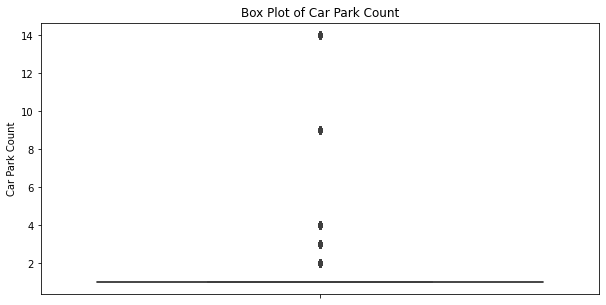

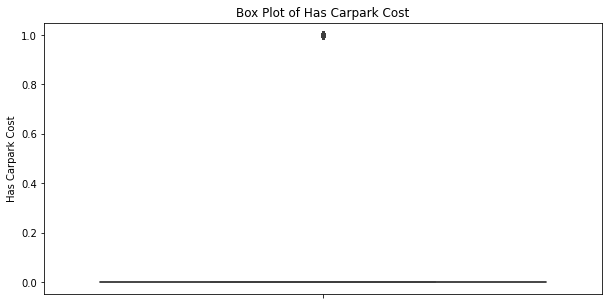

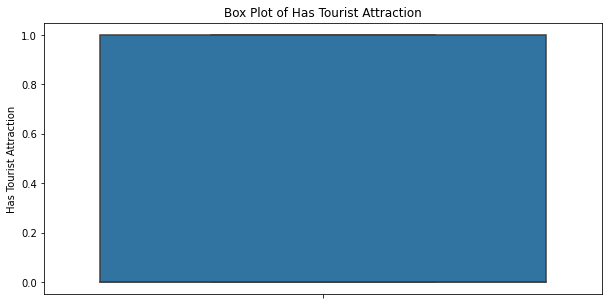

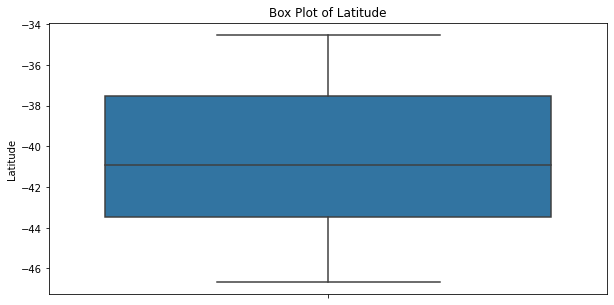

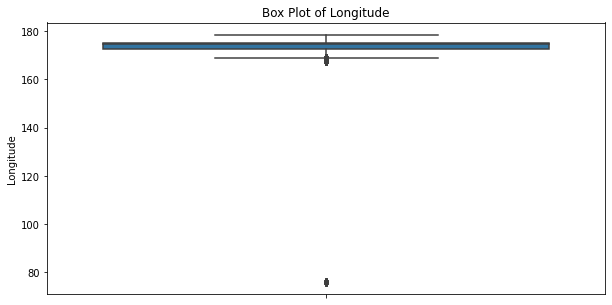

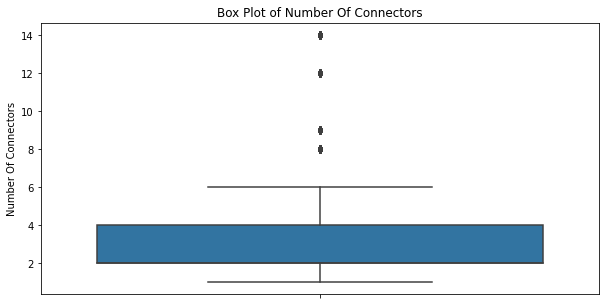

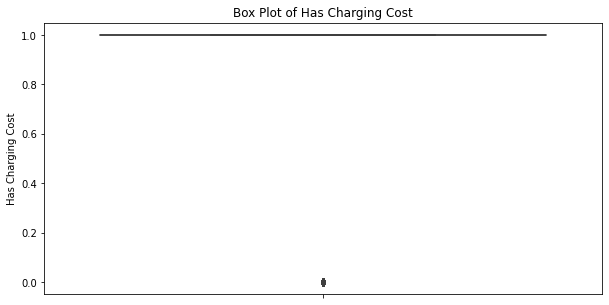

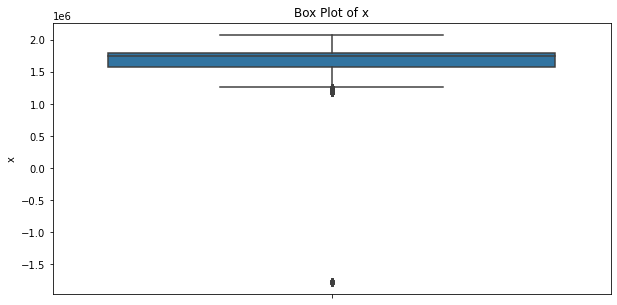

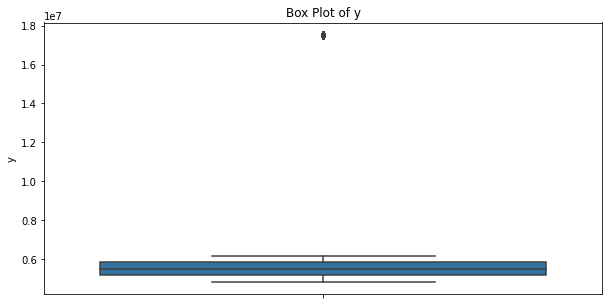

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 加载数据
# 这里假设您的 DataFrame 已经被正确加载为 df
pdf = data.toPandas()
# 数值型列列表
if pdf is not None:

    numeric_columns = ['Is 24 Hours', 'Car Park Count', 'Has Carpark Cost', 'Has Tourist Attraction',
                       'Latitude', 'Longitude', 'Number Of Connectors', 'Has Charging Cost', 'x', 'y']

    # 绘制每个数值型列的箱型图
    for column in numeric_columns:
        plt.figure(figsize=(10, 5))
        sns.boxplot(y=pdf[column])
        plt.title(f"Box Plot of {column}")
        plt.show()


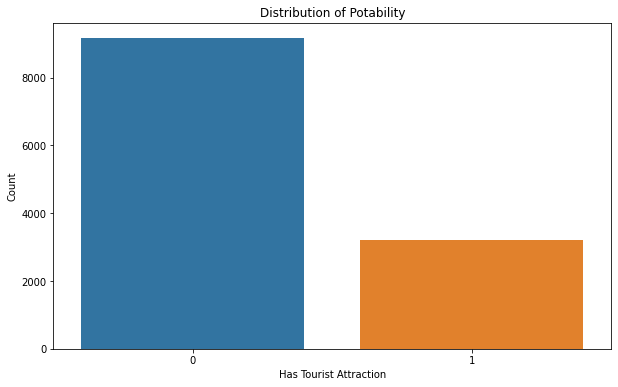

In [8]:
# 绘制Has Tourist Attraction变量的分布直方图
plt.figure(figsize=(10, 6))
sns.countplot(x=pdf['Has Tourist Attraction'])
plt.xlabel('Has Tourist Attraction')
plt.ylabel('Count')
plt.title('Distribution of Potability')
plt.xticks([0, 1])  # 确保x轴上只有0和1
plt.show()

In [9]:


# 展示剩余的列
print("Remaining columns after cleaning ‘Date First Operational’:")
print(data.columns)


Remaining columns after cleaning ‘Date First Operational’:
['OBJECTID', 'Is 24 Hours', 'Car Park Count', 'Has Carpark Cost', 'Has Tourist Attraction', 'Latitude', 'Longitude', 'Number Of Connectors', 'Has Charging Cost', 'x', 'y']


In [10]:
data.printSchema()

root
 |-- OBJECTID: integer (nullable = true)
 |-- Is 24 Hours: integer (nullable = false)
 |-- Car Park Count: integer (nullable = true)
 |-- Has Carpark Cost: integer (nullable = false)
 |-- Has Tourist Attraction: integer (nullable = false)
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Number Of Connectors: integer (nullable = true)
 |-- Has Charging Cost: integer (nullable = false)
 |-- x: double (nullable = true)
 |-- y: double (nullable = true)



In [11]:
# 处理空值
from pyspark.sql.functions import mean
means = data.select([mean(col).alias(col) for col in data.columns if col != 'Car Park Count ']).collect()[0].asDict()

# 用平均值填充空值
data_clean = data.fillna(means)


#缺失值
missing_values = data_clean.select([F.count(F.when(F.col(c).isNull(), c)).alias(c) for c in data.columns])

# 将结果转换为 Pandas 进行进一步处理
missing_data = missing_values.toPandas().transpose()
missing_data.columns = ["missing_count"]

print("Columns with missing values:")
print(missing_data)

Columns with missing values:
                        missing_count
OBJECTID                            0
Is 24 Hours                         0
Car Park Count                      0
Has Carpark Cost                    0
Has Tourist Attraction              0
Latitude                            0
Longitude                           0
Number Of Connectors                0
Has Charging Cost                   0
x                                   0
y                                   0


In [12]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# 计算每列的 IQR
# 注意：仅对数值型列进行计算
numerical_cols = [c for c, t in data_clean.dtypes if t != 'string' and c != 'Has Tourist Attraction']
quantiles = data_clean.approxQuantile(numerical_cols, [0.25, 0.75], 0.05)

# 创建一个字典来存储每列的上下四分位点和 IQR
iqr_dict = {col: (quantiles[i][0], quantiles[i][1], quantiles[i][1] - quantiles[i][0]) 
            for i, col in enumerate(numerical_cols)}

# 删除离群值和极值
for col_name, (Q1, Q3, IQR) in iqr_dict.items():
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data_clean = data_clean.filter((col(col_name) >= lower_bound) & (col(col_name) <= upper_bound))


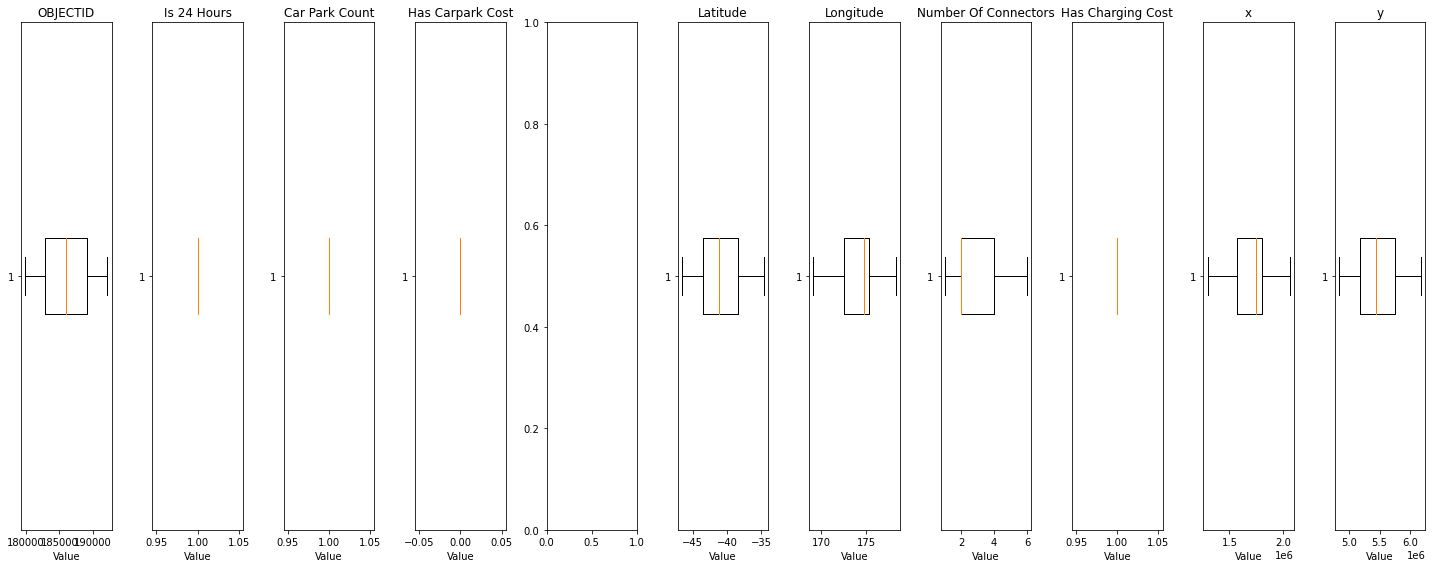

In [13]:
# 画删除了离群值的箱型图
# 将处理后的数据转换为Pandas DataFrame
data_clean_pdf = data_clean.toPandas()

# 绘制箱型图
fig, axes = plt.subplots(nrows=1, ncols=len(data_clean_pdf.columns), figsize=(20, 8))

for i, col in enumerate(data_clean_pdf.columns):
    if col != 'Has Tourist Attraction':  # 只绘制特征列的箱型图，不包括目标列
        axes[i].boxplot(data_clean_pdf[col].dropna(), vert=False)
        axes[i].set_title(col)
        axes[i].set_xlabel('Value')

plt.tight_layout()
plt.show()

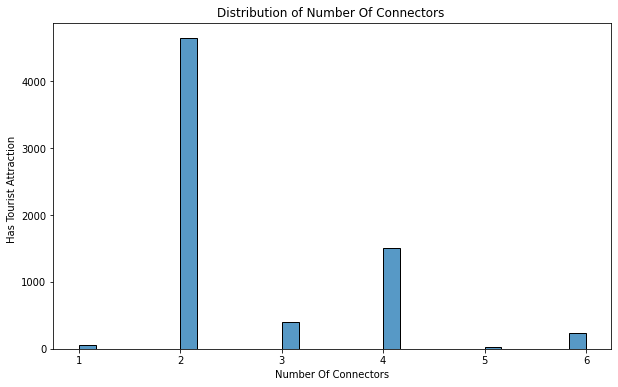

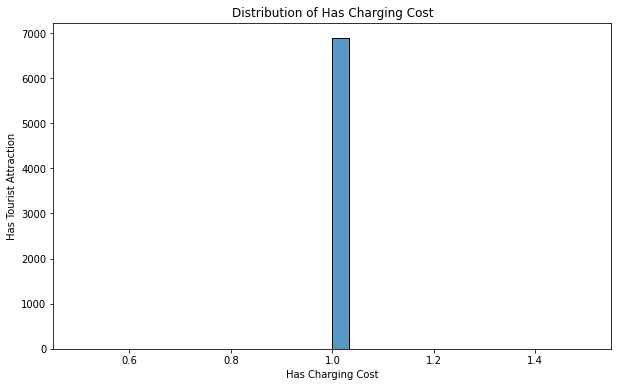

In [14]:
# 将处理后的数据转换为Pandas DataFrame
data_clean_pdf = data_clean.toPandas()

# 绘制 Solids 变量的直方图
plt.figure(figsize=(10, 6))
sns.histplot(data_clean_pdf['Number Of Connectors'].dropna(), bins=30, kde=False)
plt.title('Distribution of Number Of Connectors ')
plt.xlabel('Number Of Connectors')
plt.ylabel('Has Tourist Attraction  ')
plt.show()

# 绘制直方图
plt.figure(figsize=(10, 6))
sns.histplot(data_clean_pdf['Has Charging Cost'].dropna(), bins=30, kde=False)
plt.title('Distribution of Has Charging Cost')
plt.xlabel('Has Charging Cost')
plt.ylabel('Has Tourist Attraction')
plt.show()

In [15]:
from pyspark.sql.functions import col

# 计算 'x' 和 'Latitude' 的平均值，创建新列 'Combined Latitude'
data_clean = data_clean.withColumn(
    'Combined Latitude',
    (col('x') + col('Latitude')) / 2
)

# 计算 'y' 和 'Longitude' 的平均值，创建新列 'Combined Longitude'
data_clean = data_clean.withColumn(
    'Combined Longitude',
    (col('y') + col('Longitude')) / 2
)

# 显示前几行数据来确认新列的创建
data_clean.select('x', 'Latitude', 'Combined Latitude', 'y', 'Longitude', 'Combined Longitude').show(5)


+-----------+------------+-----------------+-----------+-----------+------------------+
|          x|    Latitude|Combined Latitude|          y|  Longitude|Combined Longitude|
+-----------+------------+-----------------+-----------+-----------+------------------+
|1366541.235|   -43.73745|683248.7487750001|5153202.164| 170.100913|   2576686.1324565|
|1458426.711|  -44.303657|   729191.2036715|5092867.904| 171.225107|   2546519.5645535|
| 1568058.01|  -43.540331|   784007.2348345|5179103.603| 172.604632|2589638.1038160003|
| 1568288.02|-43.53915549| 784122.240422255|5179235.245|172.6074866|   2589703.9262433|
|1567017.749|-43.30485776|  783487.22207112|5205250.081|172.5933352|   2602711.3371676|
+-----------+------------+-----------------+-----------+-----------+------------------+
only showing top 5 rows



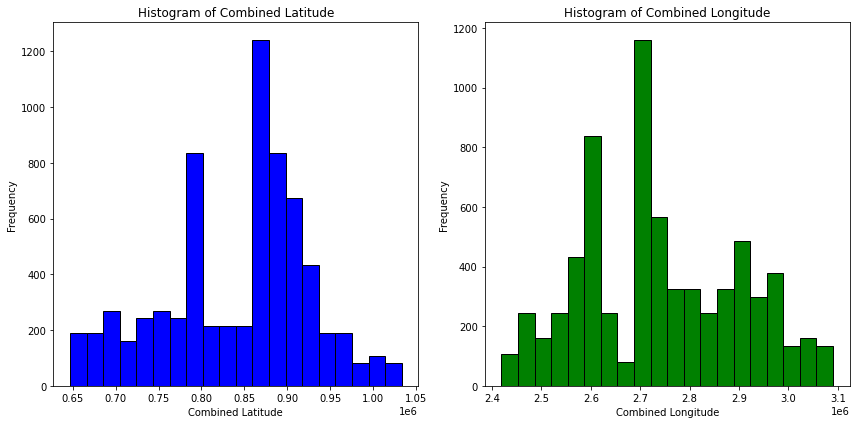

In [16]:
import matplotlib.pyplot as plt

# 提取 'Combined Latitude' 和 'Combined Longitude' 列的数据
latitude_data = data_clean.select('Combined Latitude').rdd.flatMap(lambda x: x).collect()
longitude_data = data_clean.select('Combined Longitude').rdd.flatMap(lambda x: x).collect()

# 设置图形大小
plt.figure(figsize=(12, 6))

# 绘制 'Combined Latitude' 的直方图
plt.subplot(1, 2, 1)  # 1行2列，第1个图
plt.hist(latitude_data, bins=20, color='blue', edgecolor='black')
plt.title('Histogram of Combined Latitude')
plt.xlabel('Combined Latitude')
plt.ylabel('Frequency')

# 绘制 'Combined Longitude' 的直方图
plt.subplot(1, 2, 2)  # 1行2列，第2个图
plt.hist(longitude_data, bins=20, color='green', edgecolor='black')
plt.title('Histogram of Combined Longitude')
plt.xlabel('Combined Longitude')
plt.ylabel('Frequency')

# 显示图形
plt.tight_layout()
plt.show()


In [17]:
# 读取合并三个数据集
# 读取三个CSV文件
df1 = spark.read.csv("data.csv", header=True, inferSchema=True)
df2 = spark.read.csv("data2.csv", header=True, inferSchema=True)

# 合并三个DataFrame
df = df1.union(df2)

# 获取新数据的行数和列数
num_rows = df.count()
num_cols = len(df.columns)

# 输出行数和列数
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")
df.show(100)

Number of rows: 24732
Number of columns: 11
+--------+-----------+--------------+----------------+----------------------+------------+-----------+--------------------+-----------------+-----------+-----------+
|OBJECTID|Is 24 Hours|Car Park Count|Has Carpark Cost|Has Tourist Attraction|    Latitude|  Longitude|Number Of Connectors|Has Charging Cost|          x|          y|
+--------+-----------+--------------+----------------+----------------------+------------+-----------+--------------------+-----------------+-----------+-----------+
|  179862|          1|             1|               0|                     0|   -43.73745| 170.100913|                   1|                1|1366541.235|5153202.164|
|  179863|          1|             3|               0|                     0| -45.4147023| 167.710591|                   1|                1|1186140.202|4957354.959|
|  179864|          0|             9|               0|                     0| -36.8816643|174.7839851|                   4|   

In [18]:
data_clean.printSchema()

root
 |-- OBJECTID: integer (nullable = true)
 |-- Is 24 Hours: integer (nullable = false)
 |-- Car Park Count: integer (nullable = true)
 |-- Has Carpark Cost: integer (nullable = false)
 |-- Has Tourist Attraction: integer (nullable = false)
 |-- Latitude: double (nullable = false)
 |-- Longitude: double (nullable = false)
 |-- Number Of Connectors: integer (nullable = true)
 |-- Has Charging Cost: integer (nullable = false)
 |-- x: double (nullable = false)
 |-- y: double (nullable = false)
 |-- Combined Latitude: double (nullable = true)
 |-- Combined Longitude: double (nullable = true)



In [19]:
from pyspark.sql.functions import col
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml.regression import LinearRegression

# 准备特征向量
feature_columns = [column for column in data_clean.columns if column not in ['Has Tourist Attraction', 'Combined Latitude', 'Combined Longitude']]
assembler = VectorAssembler(inputCols=feature_columns, outputCol='features')

# 将特征向量添加到 DataFrame
data_with_features = assembler.transform(data_clean)

# 标准化特征
scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures")
scaler_model = scaler.fit(data_with_features)
data_scaled = scaler_model.transform(data_with_features)

# 选择特征和目标变量列
final_data = data_scaled.select('scaledFeatures', col('Has Tourist Attraction').alias('label'))

# 创建线性回归模型，并指定正则化参数和求解器
lr = LinearRegression(featuresCol='scaledFeatures', labelCol='label', solver='normal', regParam=0.1)

# 训练模型
lr_model = lr.fit(final_data)

# 打印系数和截距
print(f"Coefficients: {lr_model.coefficients}")
print(f"Intercept: {lr_model.intercept}")

# 尝试打印每个特征的 p 值
try:
    p_values = lr_model.summary.pValues
    for feature, p_value in zip(feature_columns, p_values):
        print(f"Feature: {feature}, p-value: {p_value}")
except Exception as e:
    print(f"Could not retrieve p-values: {e}")

# 打印模型摘要信息
try:
    print(f"RMSE: {lr_model.summary.rootMeanSquaredError}")
    print(f"r2: {lr_model.summary.r2}")
except Exception as e:
    print(f"Could not retrieve model summary: {e}")


24/05/23 18:59:14 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
24/05/23 18:59:14 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.ForeignLinkerBLAS
24/05/23 18:59:14 WARN InstanceBuilder$NativeLAPACK: Failed to load implementation from:dev.ludovic.netlib.lapack.JNILAPACK


Coefficients: [-0.2617818830187416,0.0,0.0,0.0,0.001129069227876443,-0.0022721269539751265,-0.004491163280445396,0.0,-0.002128962863648757,0.0010733208206641285]
Intercept: 14.121828536588737
Feature: OBJECTID, p-value: 0.0
Feature: Is 24 Hours, p-value: 1.0
Feature: Car Park Count, p-value: 1.0
Feature: Has Carpark Cost, p-value: 1.0
Feature: Latitude, p-value: 0.8446160787561279
Feature: Longitude, p-value: 0.6922312497275225
Feature: Number Of Connectors, p-value: 0.16675279502214835
Feature: Has Charging Cost, p-value: 1.0
Feature: x, p-value: 0.711693838997493
Feature: y, p-value: 0.85193341123091
RMSE: 0.2982315468157523
r2: 0.5294016758376394


In [20]:
training = data_clean.sample(withReplacement=False, fraction=0.85, seed=888)

# 显示行数
print(f"Number of rows in the training data: {training.count()}")

Number of rows in the training data: 5856


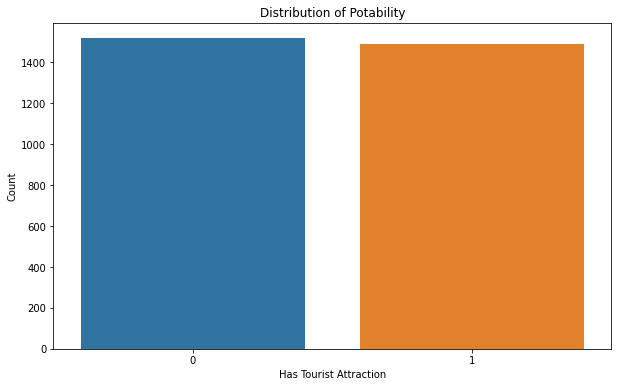

In [21]:
# 欠采样
# 分割多数类和少数类样本
train_major = training.filter(col('Has Tourist Attraction') == 0)
train_minor = training.filter(col('Has Tourist Attraction') == 1)

# 计算多数类样本和少数类样本的数量
n_major = train_major.count()
n_minor = train_minor.count()

# 从多数类中随机选择和少数类相同数量的样本
train_major_sampled = train_major.sample(withReplacement=False, fraction=n_minor / n_major, seed=42)

# 合并多数类下采样后的样本与少数类样本
train_down = train_major_sampled.union(train_minor)

# 洗牌数据
train_down = train_down.orderBy(F.rand(seed=42))

# 绘制potability变量的分布直方图
pdf = train_down.toPandas()
plt.figure(figsize=(10, 6))
sns.countplot(x=pdf['Has Tourist Attraction'])
plt.xlabel('Has Tourist Attraction')
plt.ylabel('Count')
plt.title('Distribution of Potability')
plt.xticks([0, 1])  # 确保x轴上只有0和1
plt.show()

In [22]:
final_output_path = "final_data.csv"
train_down.write.csv(final_output_path, header=True, mode='overwrite')

In [23]:
from pyspark.sql import SparkSession

# 创建Spark会话
spark = SparkSession.builder.appName("DataReading").getOrCreate()

# 加载数据
data = spark.read.csv("final_data.csv", header=True, inferSchema=True)

In [24]:
# 决策树模型的建模和预测
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# 分离预测变量和目标变量
feature_columns = ['OBJECTID', 'Is 24 Hours', 'Car Park Count', 'Has Carpark Cost', 'Latitude', 'Longitude', 'Number Of Connectors', 'Has Charging Cost','x','y','Combined Latitude','Combined Longitude']
assembler = VectorAssembler(inputCols=feature_columns, outputCol='features')
data = assembler.transform(data)

# 选择特征和目标变量列
data = data.select('features', 'Has Tourist Attraction')

# 划分数据集为训练集和测试集
train_data, test_data = data.randomSplit([0.8, 0.2], seed=88)

# 创建决策树分类器实例
classifier = DecisionTreeClassifier(labelCol='Has Tourist Attraction',
                                    featuresCol='features',
                                    maxDepth=30, minInstancesPerNode=1, minInfoGain=0.0, seed=88)
# 训练模型
model = classifier.fit(train_data)

# 进行预测
predictions = model.transform(test_data)

In [25]:
paramMap = classifier.extractParamMap()
params = {param.name: val for param, val in paramMap.items()}
print(params)

{'seed': 88, 'maxDepth': 30, 'maxBins': 32, 'minInstancesPerNode': 1, 'minInfoGain': 0.0, 'maxMemoryInMB': 256, 'cacheNodeIds': False, 'checkpointInterval': 10, 'impurity': 'gini', 'leafCol': '', 'minWeightFractionPerNode': 0.0, 'predictionCol': 'prediction', 'featuresCol': 'features', 'labelCol': 'Has Tourist Attraction', 'rawPredictionCol': 'rawPrediction', 'probabilityCol': 'probability'}


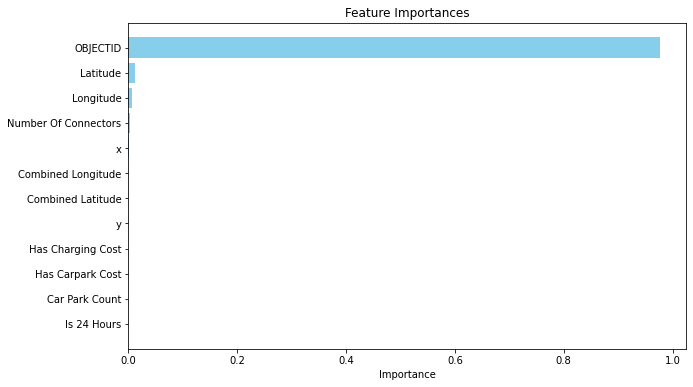

In [26]:
#决策树 变量重要性
import pandas as pd
import matplotlib.pyplot as plt
# 显示变量重要性
feature_importances = model.featureImportances.toArray()

# 创建一个DataFrame来展示特征名和它们的重要性
features = ['OBJECTID', 'Is 24 Hours', 'Car Park Count', 'Has Carpark Cost', 'Latitude', 'Longitude', 'Number Of Connectors', 'Has Charging Cost','x','y','Combined Latitude','Combined Longitude']
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=True)

# 绘制条形图
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()


24/05/23 18:59:25 WARN DAGScheduler: Broadcasting large task binary with size 1247.8 KiB


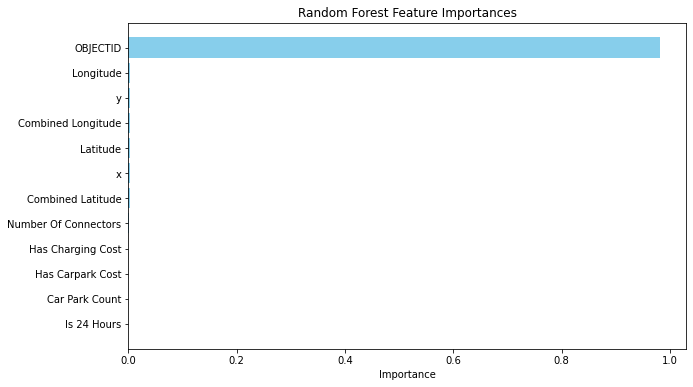

In [27]:
# 随机森林建模和预测绘图
from pyspark.ml.classification import RandomForestClassifier
# 创建随机森林分类器实例

rf_classifier = RandomForestClassifier(
    labelCol='Has Tourist Attraction', 
    featuresCol='features', 
    numTrees=500,               # 对应于 n_estimators
    featureSubsetStrategy='log2', # 对应于 max_features
    minInstancesPerNode=1,       # 对应于 min_samples_leaf
    minInfoGain=0.0,             # PySpark 没有直接对应的 min_samples_split 参数，但 minInfoGain 类似
    seed=88
)

# 训练模型
rf_model = rf_classifier.fit(train_data)

# 显示变量重要性
rf_feature_importances = rf_model.featureImportances.toArray()

# 创建一个DataFrame来展示特征名和它们的重要性
rf_features = ['OBJECTID', 'Is 24 Hours', 'Car Park Count', 'Has Carpark Cost', 'Latitude', 'Longitude', 'Number Of Connectors', 'Has Charging Cost','x','y','Combined Latitude','Combined Longitude']

rf_feature_importance_df = pd.DataFrame({
    'Feature': rf_features,
    'Importance': rf_feature_importances
}).sort_values(by='Importance', ascending=True)

# 绘制条形图
plt.figure(figsize=(10, 6))
plt.barh(rf_feature_importance_df['Feature'], rf_feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Random Forest Feature Importances')
plt.show()

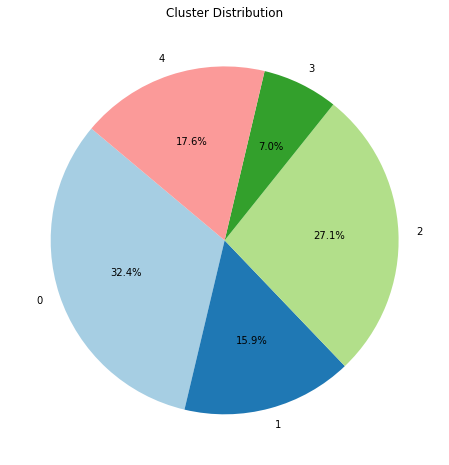

In [28]:
# K Means
from pyspark.ml.clustering import KMeans
from pyspark.sql.functions import col
import pandas as pd
import matplotlib.pyplot as plt

# 创建K-means聚类实例
kmeans = KMeans(featuresCol='features', k=5, seed=88)

# 训练模型
kmeans_model = kmeans.fit(data)

# 进行预测
kmeans_predictions = kmeans_model.transform(data)

# 统计每个类的数量
cluster_counts = kmeans_predictions.groupBy('prediction').count().orderBy('prediction').toPandas()

# 绘制饼图
plt.figure(figsize=(8, 8))
plt.pie(cluster_counts['count'], labels=cluster_counts['prediction'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Cluster Distribution')
plt.show()

In [29]:
# # 显示决策树模型
print(model.toDebugString)

DecisionTreeClassificationModel: uid=DecisionTreeClassifier_a4e4c64dfccf, depth=7, numNodes=37, numClasses=2, numFeatures=12
  If (feature 0 <= 183181.5)
   If (feature 0 <= 182862.5)
    If (feature 0 <= 180089.5)
     If (feature 4 <= -41.311143)
      If (feature 6 <= 2.5)
       Predict: 1.0
      Else (feature 6 > 2.5)
       Predict: 0.0
     Else (feature 4 > -41.311143)
      If (feature 4 <= -36.994445)
       Predict: 1.0
      Else (feature 4 > -36.994445)
       Predict: 0.0
    Else (feature 0 > 180089.5)
     Predict: 1.0
   Else (feature 0 > 182862.5)
    If (feature 5 <= 174.7086085)
     If (feature 6 <= 3.5)
      Predict: 1.0
     Else (feature 6 > 3.5)
      If (feature 5 <= 172.37474765)
       If (feature 4 <= -44.003206500000005)
        If (feature 5 <= 171.2315435)
         Predict: 0.0
        Else (feature 5 > 171.2315435)
         Predict: 1.0
       Else (feature 4 > -44.003206500000005)
        Predict: 0.0
      Else (feature 5 > 172.37474765)
       If (

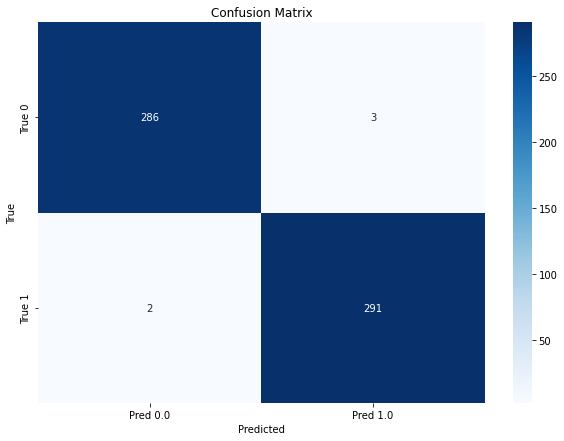

In [30]:
#绘制混淆矩阵 决策树
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 进行预测
predictions = model.transform(test_data)

# 创建混淆矩阵
confusion_matrix = predictions.groupBy('Has Tourist Attraction', 'prediction').count()

# 将混淆矩阵转换为本地数据以便绘图
cm_data = confusion_matrix.collect()

# 提取实际类别和预测类别
actual_classes = sorted(predictions.select('Has Tourist Attraction').distinct().rdd.flatMap(lambda x: x).collect())
predicted_classes = sorted(predictions.select('prediction').distinct().rdd.flatMap(lambda x: x).collect())

# 初始化混淆矩阵数据框
cm_df = pd.DataFrame(0, index=actual_classes, columns=predicted_classes)

# 填充混淆矩阵数据
for row in cm_data:
    actual = row['Has Tourist Attraction']
    predicted = row['prediction']
    count = row['count']
    cm_df.at[actual, predicted] = count

# 绘制混淆矩阵
plt.figure(figsize=(10, 7))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', xticklabels=[f'Pred {x}' for x in predicted_classes], yticklabels=[f'True {x}' for x in actual_classes])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [31]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
#多次迭代不设置seed

data = spark.read.csv("final_data.csv", header=True, inferSchema=True)
# 分离预测变量和目标变量
feature_columns = ['OBJECTID', 'Is 24 Hours', 'Car Park Count', 'Has Carpark Cost', 'Latitude', 'Longitude', 'Number Of Connectors', 'Has Charging Cost','x','y','Combined Latitude','Combined Longitude']

assembler = VectorAssembler(inputCols=feature_columns, outputCol='features')
data = assembler.transform(data)

# 选择特征和目标变量列
data = data.select('features', 'Has Tourist Attraction')

# 划分数据集为训练集和测试集
train_data, test_data = data.randomSplit([0.8, 0.2])

# 创建决策树分类器实例
classifier = DecisionTreeClassifier(labelCol='Has Tourist Attraction',
                                    featuresCol='features',
                                    maxDepth=30, minInstancesPerNode=1, minInfoGain=0.0, seed=88)
# 训练模型
model = classifier.fit(train_data)
# 进行预测
predictions = model.transform(test_data)

# 计算整体准确率
evaluator = MulticlassClassificationEvaluator(labelCol='Has Tourist Attraction', predictionCol='prediction', metricName='accuracy')
overall_accuracy = evaluator.evaluate(predictions) * 100

# 计算每个类别的准确率
confusion_matrix = predictions.groupBy('Has Tourist Attraction', 'prediction').count()

# 将混淆矩阵转换为本地数据以便计算
cm_data = confusion_matrix.collect()

# 提取实际类别和预测类别
actual_classes = sorted(predictions.select('Has Tourist Attraction').distinct().rdd.flatMap(lambda x: x).collect())

# 初始化混淆矩阵数据框
cm_df = pd.DataFrame(0, index=actual_classes, columns=actual_classes)

# 填充混淆矩阵数据
for row in cm_data:
    actual = row['Has Tourist Attraction']
    predicted = row['prediction']
    count = row['count']
    cm_df.at[actual, predicted] = count

# 计算每个类别的正确预测百分比
class_accuracies = cm_df.to_numpy().diagonal() / cm_df.sum(axis=1) * 100

# 打印结果
print("Overall accuracy: {:.2f}%".format(overall_accuracy))
for i, accuracy in enumerate(class_accuracies):
    print("Accuracy for class {}: {:.2f}%".format(actual_classes[i], accuracy))

Overall accuracy: 99.51%
Accuracy for class 0: 99.35%
Accuracy for class 1: 99.67%


24/05/23 18:59:31 WARN DAGScheduler: Broadcasting large task binary with size 1788.2 KiB
24/05/23 18:59:32 WARN DAGScheduler: Broadcasting large task binary with size 1765.6 KiB
24/05/23 18:59:32 WARN DAGScheduler: Broadcasting large task binary with size 1783.9 KiB
24/05/23 18:59:33 WARN DAGScheduler: Broadcasting large task binary with size 1767.0 KiB


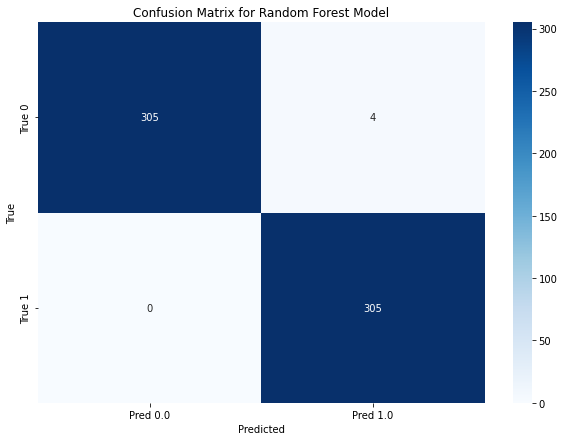

In [32]:
# 随机森林 混淆矩阵
# 进行预测
rf_predictions = rf_model.transform(test_data)

# 计算混淆矩阵
confusion_matrix = rf_predictions.groupBy('Has Tourist Attraction', 'prediction').count()

# 将混淆矩阵转换为本地数据以便绘图
cm_data = confusion_matrix.collect()

# 提取实际类别和预测类别
actual_classes = sorted(rf_predictions.select('Has Tourist Attraction').distinct().rdd.flatMap(lambda x: x).collect())
predicted_classes = sorted(rf_predictions.select('prediction').distinct().rdd.flatMap(lambda x: x).collect())

# 初始化混淆矩阵数据框
cm_df = pd.DataFrame(0, index=actual_classes, columns=predicted_classes)

# 填充混淆矩阵数据
for row in cm_data:
    actual = row['Has Tourist Attraction']
    predicted = row['prediction']
    count = row['count']
    cm_df.at[actual, predicted] = count

# 绘制混淆矩阵
plt.figure(figsize=(10, 7))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', xticklabels=[f'Pred {x}' for x in predicted_classes], yticklabels=[f'True {x}' for x in actual_classes])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [33]:
from pyspark.ml.classification import RandomForestClassifier
import pandas as pd
#随机森林准确率
rf_classifier = RandomForestClassifier(
    labelCol='Has Tourist Attraction', 
    featuresCol='features', 
    numTrees=500,               # 对应于 n_estimators
    featureSubsetStrategy='sqrt', # 对应于 max_features
    minInstancesPerNode=1,       # 对应于 min_samples_leaf
    minInfoGain=0.0,             # PySpark 没有直接对应的 min_samples_split 参数，但 minInfoGain 类似
    maxDepth=30                  # 增加 maxDepth 参数
)
train_data, test_data = data.randomSplit([0.7, 0.3])
# 训练模型
rf_model = rf_classifier.fit(train_data)
# 进行预测
rf_predictions = rf_model.transform(test_data)

# 计算整体准确率
evaluator = MulticlassClassificationEvaluator(labelCol='Has Tourist Attraction', predictionCol='prediction', metricName='accuracy')
overall_accuracy = evaluator.evaluate(rf_predictions) * 100

# 计算混淆矩阵
confusion_matrix = rf_predictions.groupBy('Has Tourist Attraction', 'prediction').count()

# 将混淆矩阵转换为本地数据以便计算
cm_data = confusion_matrix.collect()

# 提取实际类别和预测类别
actual_classes = sorted(rf_predictions.select('Has Tourist Attraction').distinct().rdd.flatMap(lambda x: x).collect())
predicted_classes = sorted(rf_predictions.select('prediction').distinct().rdd.flatMap(lambda x: x).collect())

# 初始化混淆矩阵数据框
cm_df = pd.DataFrame(0, index=actual_classes, columns=predicted_classes)

# 填充混淆矩阵数据
for row in cm_data:
    actual = row['Has Tourist Attraction']
    predicted = row['prediction']
    count = row['count']
    cm_df.at[actual, predicted] = count

# 计算每个类别的正确预测百分比
class_accuracies = cm_df.to_numpy().diagonal() / cm_df.sum(axis=1) * 100

# 打印结果
print("Overall accuracy: {:.2f}%".format(overall_accuracy))
for i, accuracy in enumerate(class_accuracies):
    print("Accuracy for class {}: {:.2f}%".format(actual_classes[i], accuracy))

24/05/23 18:59:36 WARN DAGScheduler: Broadcasting large task binary with size 1327.9 KiB
24/05/23 18:59:37 WARN DAGScheduler: Broadcasting large task binary with size 1686.5 KiB
24/05/23 18:59:38 WARN DAGScheduler: Broadcasting large task binary with size 1920.0 KiB
24/05/23 18:59:39 WARN DAGScheduler: Broadcasting large task binary with size 1913.3 KiB
24/05/23 18:59:39 WARN DAGScheduler: Broadcasting large task binary with size 1714.4 KiB
24/05/23 18:59:40 WARN DAGScheduler: Broadcasting large task binary with size 1473.3 KiB
24/05/23 18:59:40 WARN DAGScheduler: Broadcasting large task binary with size 1150.3 KiB
24/05/23 18:59:42 WARN DAGScheduler: Broadcasting large task binary with size 2.6 MiB
24/05/23 18:59:42 WARN DAGScheduler: Broadcasting large task binary with size 2.6 MiB
24/05/23 18:59:43 WARN DAGScheduler: Broadcasting large task binary with size 2.6 MiB
24/05/23 18:59:44 WARN DAGScheduler: Broadcasting large task binary with size 2.6 MiB


Overall accuracy: 99.55%
Accuracy for class 0: 99.78%
Accuracy for class 1: 99.31%


24/05/23 18:59:44 WARN DAGScheduler: Broadcasting large task binary with size 2.6 MiB


24/05/23 18:59:44 WARN DAGScheduler: Broadcasting large task binary with size 2.6 MiB
24/05/23 18:59:45 WARN DAGScheduler: Broadcasting large task binary with size 2.6 MiB
24/05/23 18:59:46 WARN DAGScheduler: Broadcasting large task binary with size 2.6 MiB
24/05/23 18:59:46 WARN DAGScheduler: Broadcasting large task binary with size 2.6 MiB


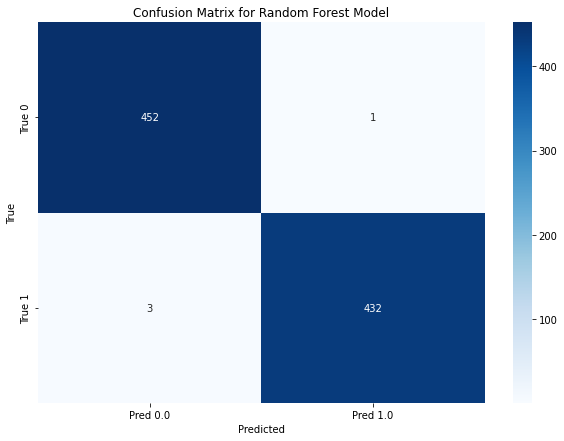

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
#计算混淆矩阵
confusion_matrix = rf_predictions.groupBy('Has Tourist Attraction', 'prediction').count()

# 将混淆矩阵转换为本地数据以便绘图
cm_data = confusion_matrix.collect()

# 提取实际类别和预测类别
actual_classes = sorted(rf_predictions.select('Has Tourist Attraction').distinct().rdd.flatMap(lambda x: x).collect())
predicted_classes = sorted(rf_predictions.select('prediction').distinct().rdd.flatMap(lambda x: x).collect())

# 初始化混淆矩阵数据框
cm_df = pd.DataFrame(0, index=actual_classes, columns=predicted_classes)

# 填充混淆矩阵数据
for row in cm_data:
    actual = row['Has Tourist Attraction']
    predicted = row['prediction']
    count = row['count']
    cm_df.at[actual, predicted] = count

# 绘制混淆矩阵
plt.figure(figsize=(10, 7))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', xticklabels=[f'Pred {x}' for x in predicted_classes], yticklabels=[f'True {x}' for x in actual_classes])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [35]:
data = spark.read.csv("final_data.csv", header=True, inferSchema=True)
df = data.toPandas()
df.head(10)

,OBJECTID,Is 24 Hours,Car Park Count,Has Carpark Cost,Has Tourist Attraction,Latitude,Longitude,Number Of Connectors,Has Charging Cost,x,y,Combined Latitude,Combined Longitude
0,180096,1,1,0,1,-41.334271,174.773264,2,1,1748381.295,5422617.853,874169.980364,2.711396e+06
1,181776,1,1,0,1,-41.145665,174.839828,4,1,1754394.813,5443441.219,877176.833668,2.721808e+06
2,182744,1,1,0,1,-37.803753,175.769951,2,1,1843864.781,5812343.767,921913.488623,2.906260e+06
3,181431,1,1,0,1,-40.917054,175.002489,4,1,1768628.287,5468520.200,884293.684973,2.734348e+06
4,180876,1,1,0,1,-36.830041,174.796572,2,1,1760214.448,5922475.468,880088.808980,2.961325e+06
5,184507,1,1,0,0,-43.506907,172.547382,4,1,1563412.592,5182792.043,781684.542546,2.591482e+06
6,191578,1,1,0,0,-43.517235,172.587829,2,1,1566687.777,5181662.025,783322.129883,2.590917e+06
7,181525,1,1,0,1,-43.905280,171.745359,3,1,1499250.062,5137882.392,749603.078360,2.569027e+06
8,190252,1,1,0,0,-45.324121,170.816989,2,1,1428918.557,4978724.701,714436.616440,2.489448e+06
9,184732,1,1,0,0,-44.002983,170.475634,2,1,1397618.964,5124697.654,698787.480509,2.562434e+06


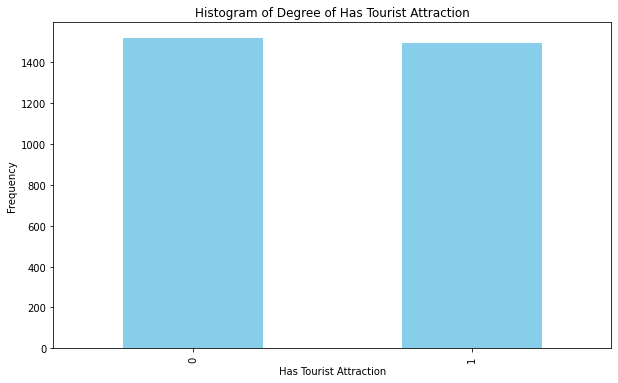

In [36]:
# 转换为Pandas DataFrame
df_pandas = data.select('Has Tourist Attraction').toPandas()

# 绘制直方图
plt.figure(figsize=(10, 6))
df_pandas['Has Tourist Attraction'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.xlabel('Has Tourist Attraction')
plt.ylabel('Frequency')
plt.title('Histogram of Degree of Has Tourist Attraction')
plt.show()

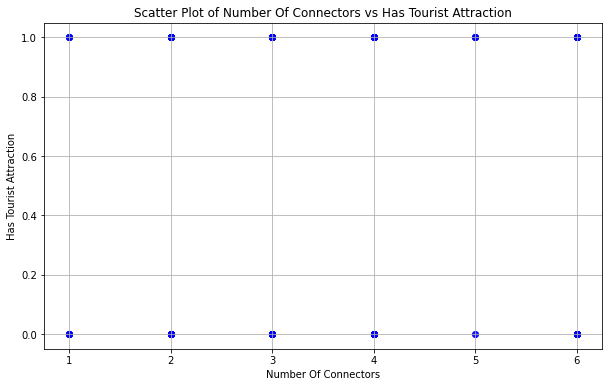

In [42]:
import matplotlib.pyplot as plt

# 从 PySpark DataFrame 转换为 Pandas DataFrame
df_pandas = data.select('Number Of Connectors', 'Has Tourist Attraction').toPandas()

# 绘制散点图
plt.figure(figsize=(10, 6))
plt.scatter(df_pandas['Number Of Connectors'], df_pandas['Has Tourist Attraction'], alpha=0.5, color='blue')
plt.xlabel('Number Of Connectors')
plt.ylabel('Has Tourist Attraction')
plt.title('Scatter Plot of Number Of Connectors vs Has Tourist Attraction')
plt.grid(True)
plt.show()

24/05/23 19:08:56 WARN DAGScheduler: Broadcasting large task binary with size 2.6 MiB


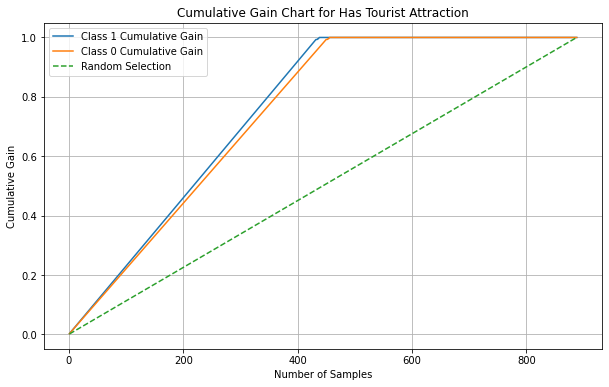

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyspark.sql.functions import col

# 假设已经有 rf_model 和 test_data
# 进行预测，并包含预测概率
rf_predictions = rf_model.transform(test_data)

# 提取预测概率和实际标签
predictions_df = rf_predictions.select('Has Tourist Attraction', 'probability').toPandas()

# 将预测概率转换为数组
predictions_df['probability_class_1'] = predictions_df['probability'].apply(lambda x: x[1])
predictions_df['probability_class_0'] = predictions_df['probability'].apply(lambda x: x[0])

# 按预测概率排序
predictions_df_class_1 = predictions_df.sort_values(by='probability_class_1', ascending=False)
predictions_df_class_0 = predictions_df.sort_values(by='probability_class_0', ascending=False)

# 计算累积增益（class 1）
predictions_df_class_1['cum_true_positives'] = np.cumsum(predictions_df_class_1['Has Tourist Attraction'])
predictions_df_class_1['cum_population'] = np.arange(1, len(predictions_df_class_1) + 1)
predictions_df_class_1['cum_gain'] = predictions_df_class_1['cum_true_positives'] / predictions_df_class_1['Has Tourist Attraction'].sum()

# 计算累积增益（class 0）
predictions_df_class_0['cum_true_negatives'] = np.cumsum(1 - predictions_df_class_0['Has Tourist Attraction'])
predictions_df_class_0['cum_population'] = np.arange(1, len(predictions_df_class_0) + 1)
predictions_df_class_0['cum_gain'] = predictions_df_class_0['cum_true_negatives'] / (len(predictions_df_class_0) - predictions_df_class_0['Has Tourist Attraction'].sum())

# 计算随机选择曲线
random_gain = predictions_df_class_1['cum_population'] / len(predictions_df_class_1)

# 绘制累积增益图
plt.figure(figsize=(10, 6))
plt.plot(predictions_df_class_1['cum_population'], predictions_df_class_1['cum_gain'], label='Class 1 Cumulative Gain')
plt.plot(predictions_df_class_0['cum_population'], predictions_df_class_0['cum_gain'], label='Class 0 Cumulative Gain')
plt.plot(predictions_df_class_1['cum_population'], random_gain, label='Random Selection', linestyle='--')
plt.xlabel('Number of Samples')
plt.ylabel('Cumulative Gain')
plt.title('Cumulative Gain Chart for Has Tourist Attraction')
plt.legend()
plt.grid(True)
plt.show()
